In [132]:
import hist
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [133]:
geometries = ['current-geometry', 'iRPC-added-geometry', 'target-geometry']
sample_types = ['2025-mu-pt10', '2025-mu-pt100', '2025-mu-pt1000']
data = []
for geometry in geometries:
    sample = uproot.open(f"output/{sample_types[1]}-{geometry}.root:muonAnalyzer/MuonTree").arrays(library="np")
    flat_sample = {key: np.concatenate(sample[key]) for key in sample.keys()}
    data.append(flat_sample)

In [134]:
bins = 100
h_sim_eta_list = []
h_reco_eta_list = []
h_sa_eta_list = []
h_gb_eta_list = []

for sample in data:
    sim_eta = sample['simMuon_eta']
    reco_eta = sample['recoMuon_eta']
    is_standalone = sample['recoMuon_isStandalone']
    is_global = sample['recoMuon_isGlobal']
    sa_eta = reco_eta[
        is_standalone \
        & (sample['recoMuon_pt_rank'] == 1) \
        & (sample['recoMuon_dr_rank'] == 1) \
        & (sample['recoMuon_dr'] < 0.1)
    ]
    gb_eta = reco_eta[
        is_global \
        & (sample['recoMuon_pt_rank'] == 1) \
        & (sample['recoMuon_dr_rank'] == 1) \
        & (sample['recoMuon_dr'] < 0.1)
    ]

    h_sim_eta = hist.Hist.new.Regular(bins, -2.5, 2.5).Weight()
    h_reco_eta = hist.Hist.new.Regular(bins, -2.5, 2.5).Weight()
    h_sa_eta = hist.Hist.new.Regular(bins, -2.5, 2.5).Weight()
    h_gb_eta = hist.Hist.new.Regular(bins, -2.5, 2.5).Weight()

    h_sim_eta.fill(sim_eta)
    h_reco_eta.fill(reco_eta)
    h_sa_eta.fill(sa_eta)
    h_gb_eta.fill(gb_eta)
    
    h_sim_eta_list.append(h_sim_eta)
    h_reco_eta_list.append(h_reco_eta)
    h_sa_eta_list.append(h_sa_eta)
    h_gb_eta_list.append(h_gb_eta)

In [135]:
print(h_sim_eta_list[0].values())
print(h_reco_eta_list[0].values())
print(len(h_sim_eta_list[0].values()))
print(h_sim_eta_list[0].axes[0].edges)
print(len(h_sim_eta_list[0].axes[0].edges))

[7627. 7557. 7540. 7595. 7453. 7482. 7547. 7529. 7610. 7650. 7620. 7653.
 7541. 7664. 7600. 7517. 7530. 7648. 7563. 7520. 7648. 7621. 7642. 7756.
 7540. 7560. 7557. 7585. 7624. 7556. 7539. 7651. 7557. 7462. 7535. 7659.
 7583. 7744. 7623. 7581. 7597. 7544. 7583. 7602. 7658. 7551. 7657. 7603.
 7659. 7506. 7495. 7719. 7515. 7684. 7515. 7734. 7717. 7370. 7634. 7742.
 7517. 7730. 7552. 7603. 7612. 7489. 7609. 7852. 7500. 7462. 7463. 7547.
 7702. 7565. 7648. 7775. 7612. 7529. 7581. 7374. 7499. 7683. 7629. 7563.
 7663. 7596. 7672. 7717. 7708. 7524. 7603. 7630. 7509. 7548. 7819. 7678.
 7529. 7732. 7604. 7818.]
[ 507. 6396. 7607. 7658. 7549. 7572. 7643. 7624. 7689. 7736. 7705. 7706.
 7632. 7702. 7667. 7551. 7576. 7670. 7601. 7535. 7668. 7636. 7653. 7778.
 7552. 7565. 7604. 7600. 7664. 7631. 7592. 7722. 7607. 7500. 7563. 7682.
 7641. 7785. 7727. 7587. 7620. 7566. 7628. 7623. 7653. 7547. 7650. 7600.
 7670. 7654. 7645. 7721. 7515. 7703. 7492. 7732. 7728. 7417. 7666. 7746.
 7537. 7873. 7594. 7689. 

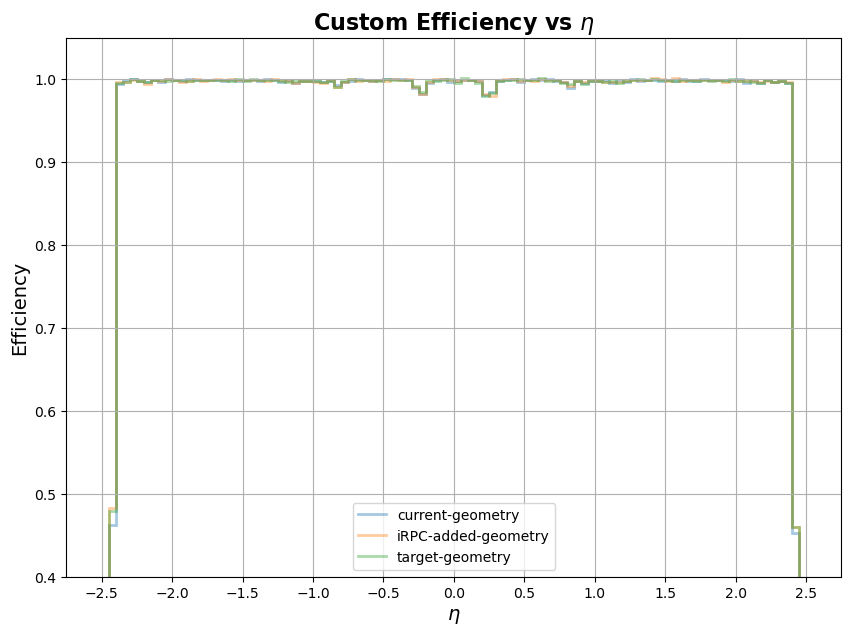

In [137]:
plt.figure(figsize=(10, 7))
bin_edges = h_sim_eta_list[0].axes[0].edges

for i in range(len(h_sim_eta_list)):
    ratio = h_gb_eta_list[i].values() / h_sim_eta_list[i].values()
    plt.stairs(ratio, bin_edges, label=f'{geometries[i]}', lw=2, alpha=0.4)

plt.xlabel(r'$\eta$', fontsize=14)
plt.xticks(np.linspace(-2.5, 2.5, 11))
plt.ylabel('Efficiency', fontsize=14)
plt.ylim(0.4, 1.05)
#plt.xlim(-2.6, 2.6)

plt.title(r'Custom Efficiency vs $\eta$', weight='bold', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()